In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import xarray
import IPython.display
#import cmocean as cm
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
#import cosima_cookbook as cc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cartopy

import cartopy.crs as crs
import cartopy.feature as cfeature

import sys
from itertools import combinations
from datetime import datetime
import random
import warnings

warnings.filterwarnings("ignore")

print("Python Version : ", sys.version)
print("Cartopy Version : ", cartopy.__version__)

import cartopy.feature as cft
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                   edgecolor='black', facecolor='papayawhip', linewidth=0.5)

Python Version :  3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Cartopy Version :  0.18.0


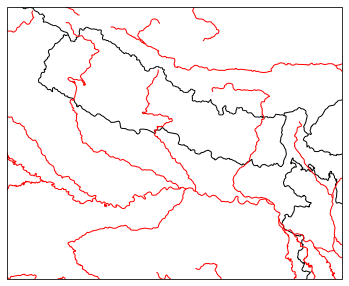

In [2]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1, projection=crs.Mercator())
#ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
# lat1, lon1, lat2, lon2 = 20, 80, 28, 90
# ax.set_extent([lat1, lon1, lat2, lon2], crs=crs.PlateCarree())
#ax.set_xlim(65, 95)
#ax.set_ylim(5, 40)
ax.set_extent([79,90,23,31])
ax.add_feature(cfeature.RIVERS, edgecolor="red")
plt.show()

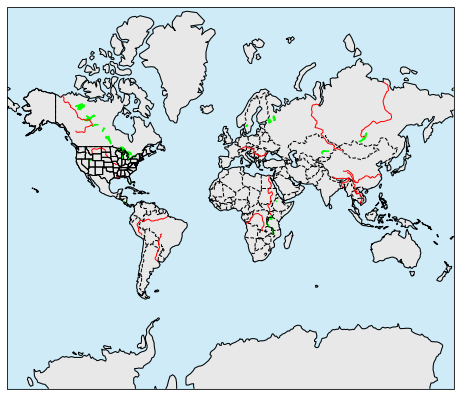

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=crs.Mercator())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.5)
ax.add_feature(cfeature.LAKES, color="lime")
ax.add_feature(cfeature.BORDERS, linestyle="--")
ax.add_feature(cfeature.OCEAN, color="skyblue", alpha=0.4)
ax.add_feature(cfeature.RIVERS, edgecolor="red")
ax.add_feature(cfeature.STATES)
plt.show()

In [4]:
def sample_data(shape=(73, 145)):
    """Return ``lons``, ``lats`` and ``data`` of some fake data."""
    nlats, nlons = shape
    lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
    lons = np.linspace(0, 2 * np.pi, nlons)
    lons, lats = np.meshgrid(lons, lats)
    wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

    lats = np.rad2deg(lats)
    lons = np.rad2deg(lons)
    data = wave + mean

    return lons, lats, data


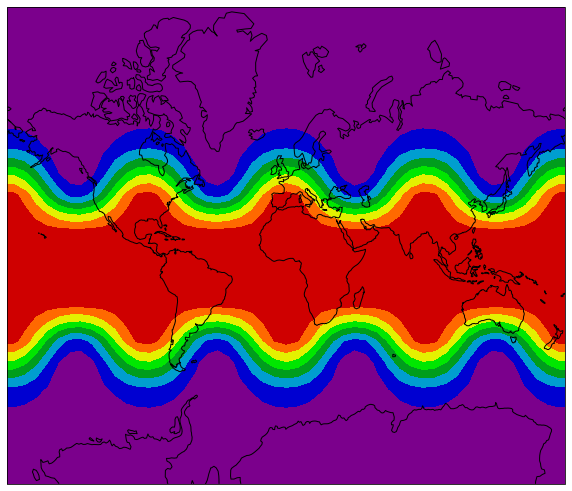

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-0.99558321, -0.99559514, -0.99562784, -0.99567291, -0.99571874,
        -0.99575354, -0.99576835, -0.99575937, -0.99572889, -0.99568478,
        -0.99563837, -0.99560161, -0.99558397, -0.99558998, -0.9956181 ,
        -0.99566109, -0.99570788, -0.99574644, -0.

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

lons, lats, data = sample_data((20,50))

ax.contourf(lons, lats, data,
            transform=ccrs.PlateCarree(),
            cmap='nipy_spectral')
ax.coastlines()
ax.set_global()
plt.show()
data

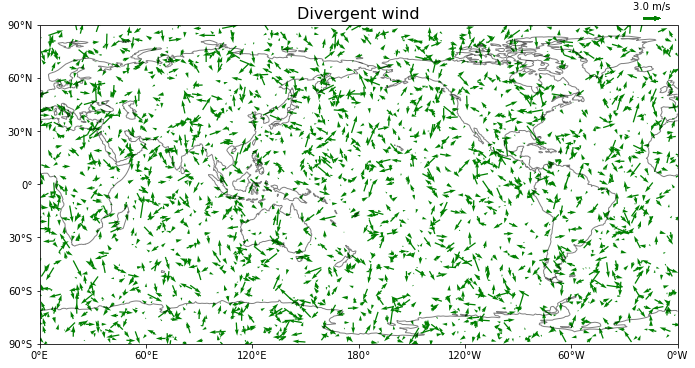

In [6]:
shp = (50, 50)
lons = np.random.randint(-179, 179, shp)# longnitude array same shape as the shape of the vector (2D)
lats = np.random.randint(-89, 89, shp)# latitute array same shape as the shape of the vector (2D)
u = np.random.randn(*shp) # horizantal verlocity vector
v = np.random.randn(*shp)


proj = ccrs.PlateCarree(central_longitude=180)
fig, ax = plt.subplots(figsize=(10,5), subplot_kw=dict(projection=proj), constrained_layout=True)

ax.set_title('Divergent wind', fontsize=16)
q = ax.quiver(lons, lats, u, v, transform=ccrs.PlateCarree(), color="g", width=0.002, scale_units='xy', scale=0.3)
ax.coastlines('110m', alpha=0.5)
qk = ax.quiverkey (q, 0.96, 1.02, 3.0, '3.0 m/s')
ax.set_xticks([0, 60, 120, 180, 240, 300, 359.99], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(zero_direction_label=True, number_format='.0f')
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

In [7]:
# import xarray as xr
# import numpy as np
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
#
# fid = 'haiti_hemi_era5_pl_20100122_00.grib'
# ds = []
#
# for shortName in ('z', 't', 'u', 'v', 'w', 'q'):
#     ds += [xr.open_dataset(fid,
#                            engine='cfgrib',
#                            backend_kwargs={'filter_by_keys': {'shortName': shortName}})]
# ds = xr.merge(ds, combine_attrs='override')
#
# temp = ds.t - 273.15
# temp_lim = {'min': -50.0, 'max': 0.0}
#
# windspeed = np.sqrt(ds.u**2+ds.v**2)
# wind_lim = {'min': 20.0, 'max': 100.0}
#
# lon_0 = -35.0
# lat_0 =  70.0
# n_levels = len(ds.isobaricInhPa.values)
#
# lon_idx = slice(None,None,10)
# lat_idx = slice(30,None,10)
#
# fig, ax = plt.subplots(2, n_levels,
#                        subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)},
#                        figsize=(12,8)
#                        )
#
# for ilev in range(0,n_levels):
#     level_hpa = ds.isobaricInhPa.values[ilev]
#     print('Plotting level: {} hPa'.format(level_hpa))
#     im1 = temp.isel(isobaricInhPa=ilev).plot.imshow(
#                                         cmap='Spectral_r',
#                                         interpolation='bicubic',
#                                         ax=ax[0,ilev],
#                                         transform=ccrs.PlateCarree(),
#                                         vmin=temp_lim['min'],
#                                         vmax=temp_lim['max'],
#                                         add_colorbar=False
#                                         )
#     ax[0,ilev].set_title('{} hPa'.format(level_hpa))
#     ax[0,ilev].coastlines()
#
#     v_mag = windspeed.isel(isobaricInhPa=ilev)
#     im2 = v_mag.plot.imshow(cmap='inferno_r',
#                            interpolation='bicubic',
#                            ax=ax[1,ilev],
#                            transform=ccrs.PlateCarree(),
#                            vmin=wind_lim['min'],
#                            vmax=wind_lim['max'],
#                            add_colorbar=False
#                            )
#
#     # superimpose wind direction
#     lat_ = ds.u.isel(isobaricInhPa=ilev).latitude.values[lat_idx]
#     lon_ = ds.u.isel(isobaricInhPa=ilev).longitude.values[lon_idx]
#     u_ = (ds.u.isel(isobaricInhPa=ilev)).where(
#         v_mag > wind_lim['min']).values[lat_idx,lon_idx]
#     v_ = (ds.v.isel(isobaricInhPa=ilev)).where(
#         v_mag > wind_lim['min']).values[lat_idx,lon_idx]
#     ax[1,ilev].quiver(lon_, lat_, u_, v_,
#                 scale=1000,
#                 headlength=5,
#                 minlength=2,
#                 headwidth=3,
#                 width=0.009,
#                 transform=ccrs.PlateCarree(),
#                 edgecolor='w',
#                 linewidth=0.75,
#                 regrid_shape=20
#                 )
#     ax[1,ilev].set_title('')
#     ax[1,ilev].coastlines()
#
# fig.subplots_adjust(bottom=0.2, top=0.8, left=0.1, right=0.9, wspace=0.1, hspace=0.1)
#
# cb_ax = fig.add_axes([0.15, 0.925, 0.75, 0.02])
# cbar = fig.colorbar(im1, cax=cb_ax, orientation='horizontal', extend='both')
# cbar.set_label(label='Temperature [deg C]', size=12)
#
# cb_ax = fig.add_axes([0.15, 0.1, 0.75, 0.02])
# cbar = fig.colorbar(im2, cax=cb_ax, orientation='horizontal', extend='both')
# cbar.set_label(label='Wind speed [m/s]', size=12)
#
# plt.savefig('temperature-wind-pl.png')
#
# print(ds)

In [9]:
# ds = xarray.open_dataset("1988.nc")
#
# u=ds.variables['u10'][:]
# v=ds.variables['v10'][:]
# lon=ds.variables['longitude'][:]
# lat=ds.variables['latitude'][:]
#
# lon2D, lat2D = np.meshgrid(lon, lat)
#
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax.quiver(lon2D, lat2D, u[0,:,:], v[0,:,:]) # insteadt of "0" put any time necessary